In [1]:
import cv2
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from scipy.ndimage.morphology import binary_erosion


In [2]:
file = "/common/users/dv347/Spring22/ML/pizza/live_synthetic/RESULTS_ep20/cycleGAN_preRecordedSynthetic_bs1/test_20/images/0025_1_A_fake_A.png"

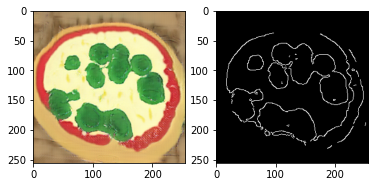

In [3]:
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img,400,600)
show_images([img, edges])

In [4]:
file2 = "/common/users/dv347/Spring22/ML/pizza/live_synthetic/RESULTS_ep20/cycleGAN_preRecordedSynthetic_bs1/test_20/images/0015_1_A_real_B.png"

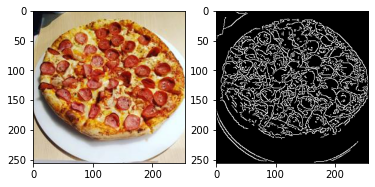

In [5]:
img = cv2.imread(file2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.blur(img, (5,5))
edges = cv2.Canny(img,300,200)
show_images([img, edges])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


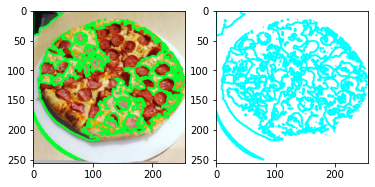

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# im2, contours = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ret, im = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy   = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

blank = np.ones(img.shape)
img2 = cv2.drawContours(img, contours, -1, (0,255,45), 2)
img3 = cv2.drawContours(blank, contours2, -1, (0,155,45), 2)

show_images([img2, img3])

In [11]:
# read image with transparency

def generate_mask(file2):
    image = cv2.imread(file2, cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # separate base image and alpha channel and make background under transparency into black to remove white border and text
    base = image[:,:,0:3]
    # alpha = image[:,:,3]
    # alpha = cv2.merge([alpha,alpha,alpha])
    # img = cv2.bitwise_and(base, alpha)

    img = image

    # convert img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ###
    edges = cv2.Canny(img,200,200)

    #do threshold on gray image
    thresh = cv2.threshold(edges, 200, 255, cv2.THRESH_BINARY)[1]

    # apply morphology close
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Get contours
    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    result = base.copy()
    for c in cnts:
        area = cv2.contourArea(c)
        if area > 9500:
            cv2.drawContours(result, [c], -1, (0, 255, 0), 3)

    # show(thresh)
    # show_images([base, img, close, result])
    # show(base)
    # show(img)
    
    
    contours = [x for x in cnts if cv2.contourArea(x) > 9000]
    idx = ... # The index of the contour that surrounds your object
    mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
    cv2.drawContours(mask, contours, -1, (255,255,255), -1) # Draw filled contour in mask
    out = np.zeros_like(img) # Extract out the object and place into output image
    out[mask == 255] = img[mask == 255]

#     save_name = "out_" + file2.split('/')[-1].split('.')[0] + ".png"
    save_name = "OUTDIR/out_" + file2.split('/')[-1]
    show_images([close, result, out], title=save_name, save=False)


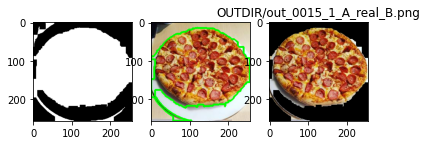

In [12]:
generate_mask(file2)

In [13]:
import glob
list_ = glob.glob("/common/users/shared/mlteam7/final-ml/resized_pizza/data1/testB/*")
# list_ = [x.split('/')[-1] for x in list_]
print(len(list_))

836


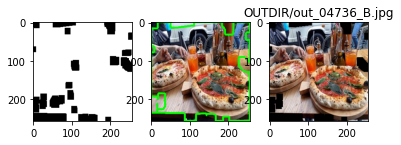

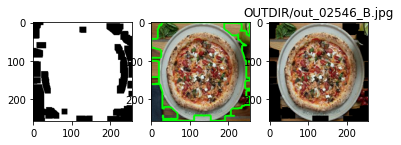

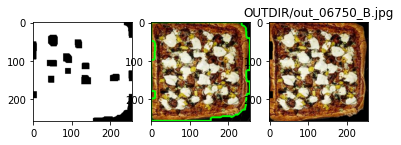

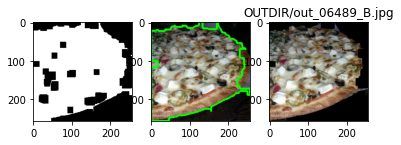

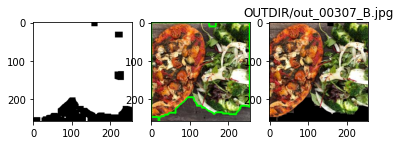

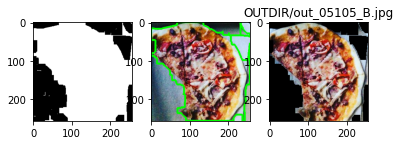

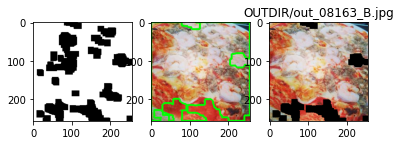

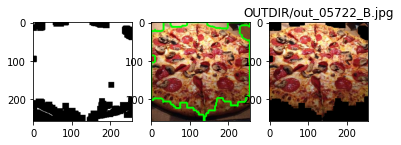

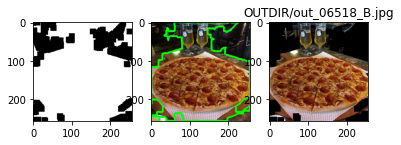

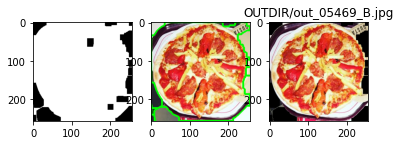

In [ ]:
# for i in range(len(list_)):
for i in range(100):
    file = list_[i]
    generate_mask(file)